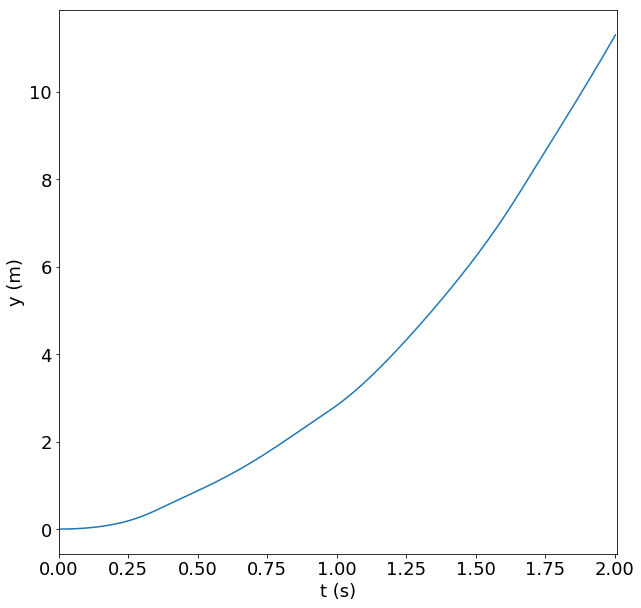

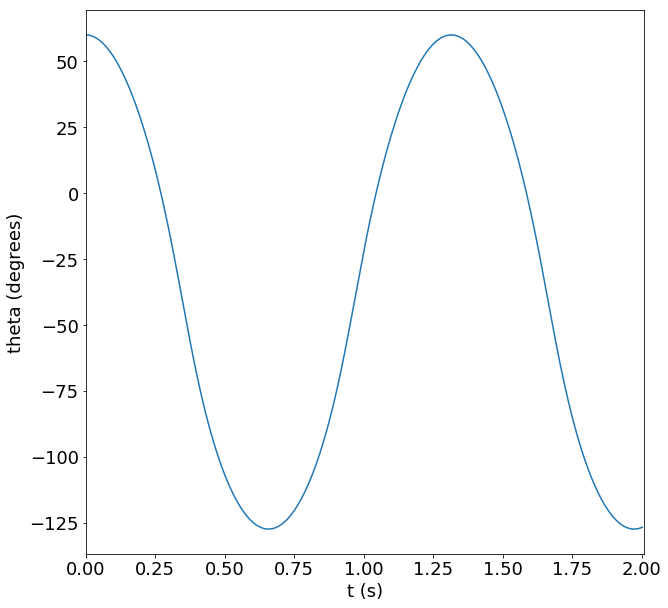

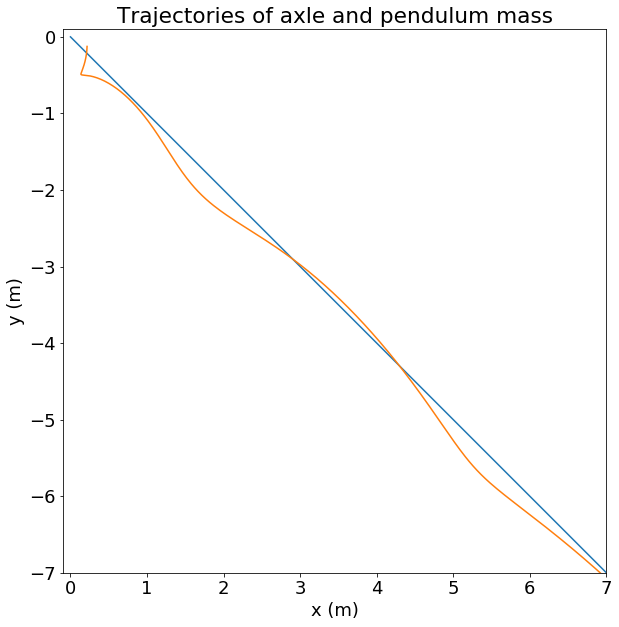

In [38]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
import math

# This is an example of using Python calculate and plot the motion of a pendulum hanging
# from the axel of a wheel rolling down a plane
# Order of variables in the array u[]:
#    0: y   
#    1: dy/dt
#    2: theta   
#    3: dtheta/dt

# Parameters describing the system
l = 0.25                  # pendulum length
g = 9.8                   # acceleration of gravity in m/s^2
m = 1                     # mass of the pendulum and of the wheel
alpha = 45*math.pi/180.   # plane angle in radians
R = 0.5                   # radius of the wheel

# Assign initial conditions to the motion.
y0 = 0                               # initial position (y increases down the plane)
yDot0 = 0.                           # initial velocity
theta0 = 60*math.pi/180.             # initial angle of the pendulum
thetaDot0 = 0.                       # initial angular velocity of 2nd pendulum
u0 = [y0, yDot0, theta0, thetaDot0]  # initial conditions for all 4 variables

# This function gives the time derivative of each of the 4 variables. These correspond to the
# four Hamilton equations of motion (1st-order differential equations)
def dudt(u, t):
    r = [0., 0., 0., 0.]
    r[0] = u[1]
    r[2] = u[3] 
    r[3] = (-(5/2)*m*g*np.sin(u[2])-2*m*g*np.sin(alpha)*np.cos(alpha+u[2])-m*l*np.sin(alpha+u[2])*np.cos(alpha+u[2])*u[3]**2)/((5/2)*m*l-m*l*np.cos(alpha+u[2])**2)   # enter the time derivative of ptheta
    r[1] = (2*m*g*np.sin(alpha)+m*l*np.sin(alpha+u[2])*u[3]**2-m*l*np.cos(alpha+u[2])*r[3])/((5/2)*m)
    
#     pd=(5/2)*m*u[1] +m*l*u[3]*np.cos(alpha+u[2])
#     pt=m*(l**2)*u[3]+m*u[1]*l*np.cos(alpha+u[2])
#     k=(5/2)-(np.cos(alpha+u[2]))**2
#     r[0] = 2*( (1/k))**(-2) * np.cos(alpha+u[2]) * np.sin(alpha+u[2]) * ((pd**2)/2*m +5*(pt**2)/4*m*(l**2) - pd*pt*np.cos(alpha+u[2])/m*l)- (1/k)*( (pd*pt/m*l)*np.sin(alpha+u[2])  ) - m*g*l*sin(u[2])  # enter the time derivative of d)
#     r[1] = (1/ ( (2.5) - (np.cos(alpha+u[2]))**2)*( (-5*pt/2*m*l**2) +pd*np.cos(alpha+u[2])/m*l ))   # enter the time derivative of pd
#     r[2] =  -2*m*g*np.sin(alpha)  # enter the time derivative of theta
#     r[3] = (1/k) * ( pd/m - pt*np.cos(alpha+u[2])/m*l)  # enter the time derivative of ptheta
    
#     k = (5*m/2) - m*(math.cos(u[2] + alpha))**2
#     pq = (5*m*u[1]/2) + m*L*u[3]*math.cos(u[2] + alpha)
#     ptheta = m*u[3]*(L**2) + m*L*u[2]*math.cos(u[2] + alpha)
#     r = [0., 0., 0., 0.]
#     r[0] = (1/k)**2*(pq - ptheta*math.cos(u[2] + alpha)) # enter the time derivative of y
#     r[1] = 2*m*g*math.sin(u[2] + alpha) # enter the time derivative of py
#     r[2] = (1/k)*(5*ptheta/(2*L**2) - pq*math.cos(u[2] + alpha)/L) # enter the time derivative of theta
#     r[3] = -m*g*L*math.sin(u[2]) + m*L*r[0]*r[2]*math.sin(u[2] + alpha)# enter the time derivative of ptheta
    return r

# Use the scipy odeint routine to carry out the numerical integration of the system of equations.
tau = 2.*math.pi*math.sqrt(L/g)
t0 = 0.                   # start time
t1 = 2.0*tau              # end time
N = 400                   # number of time steps

# Choose a set of time values at which to evaluate the solution y(t)
t = np.arange(t0,t1, (t1-t0)/N)

# Call the routing from scipy that does the integration
u = odeint(dudt, u0, t)

font = {'size'   : 18}
plt.rc('font', **font)

# Use pyplot from matplotlib to plot the motion y(t)
fig, ax = plt.subplots(figsize=(10,10))
plt.xlim(t0, t1)
ax.set_xlabel('t (s)')
ax.set_ylabel('y (m)')
ax.plot(t,u[...,0])
plt.show()

# Plot the motion theta(t)
fig, ax = plt.subplots(figsize=(10,10))
plt.xlim(t0, t1)
ax.set_xlabel('t (s)')
ax.set_ylabel('theta (degrees)')
ax.plot(t,u[...,2]*180./math.pi)
plt.show()

# Calculate and plot the 2D trajectories of the pendulum mass and axle
XA = np.zeros(N)
YA = np.zeros(N)
XP = np.zeros(N)
YP = np.zeros(N)
for i in range(N):
    XA[i] = u[i,0]*math.cos(alpha)
    YA[i] = -u[i,0]*math.sin(alpha)
    XP[i] = XA[i] + L*math.sin(u[i,2])
    YP[i] = YA[i] - L*math.cos(u[i,2])  
    
fig, ax = plt.subplots(figsize=(10,10))
plt.xlim(-.1, 7.)
plt.ylim(-7., 0.1)
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
ax.set_aspect('equal')
ax.plot(XA,YA)
ax.plot(XP,YP)
plt.title("Trajectories of axle and pendulum mass")
plt.show()

# # Now use matplotlib to make an animation of the motion
# fig = plt.figure(figsize=(10,10))
# ax = plt.axes(xlim=(-.1, 7.), ylim=(-7., .1))
# line, = ax.plot([],[],lw=2)
# ax.set_aspect('equal')
# ax.set_xlabel('x (m)')
# ax.set_ylabel('y (m)')
# plt.title("Animation of the pendulum")
# time_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)
# time_step = 1000.*(t1-t0)/N/10.    # Speed up time by a factor of 10 here

# def init():
#     line.set_data([],[])
#     time_text.set_text('')
#     return line, time_text

# def animate(i):
#     XPL = [XA[i],XP[i]]
#     YPL = [YA[i],YP[i]]
#     line.set_data(XPL,YPL)
#     time = i*time_step
#     time_text.set_text('time=%.1f ms' % time)
#     return line, time_text

# # The animation is created here    
# anim = animation.FuncAnimation(fig, animate, init_func=init,frames=N, interval=time_step, blit=True)

# # Save the animation to an mpeg file. This requires ffmpeg to be installed,
# # with the executable in the PATH
# #anim.save('doublePendulum.mp4', fps=30, extra_args=['-vcodec', 'libx264'])
   
# # Display the animation
# plt.show()